In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

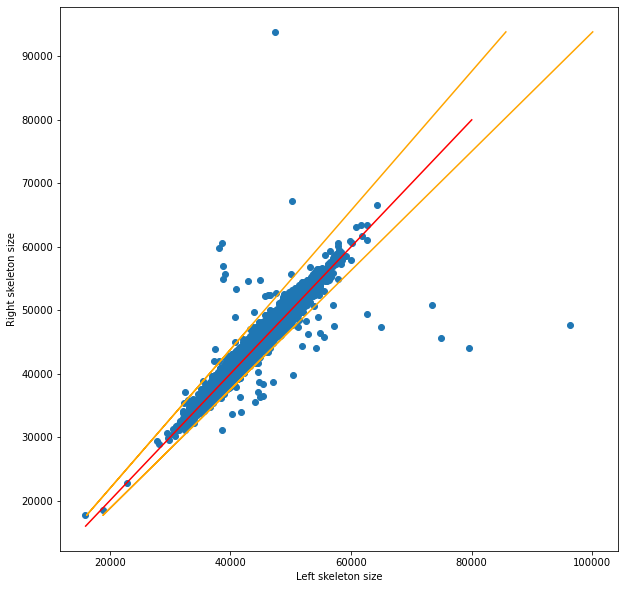

In [30]:
skeleton_type = "raw" # 'raw', '2mm'
path_to_skeletons = "/neurospin/dico/data/deep_folding/current/datasets/ABCD/skeletons"

df_Lskeleton = pd.read_csv(f'{path_to_skeletons}/L_{skeleton_type}_skeleton_size.csv')
df_Rskeleton = pd.read_csv(f'{path_to_skeletons}/R_{skeleton_type}_skeleton_size.csv')

merge = pd.merge(df_Lskeleton, df_Rskeleton, on='ID', suffixes=('_L', '_R'))
merge["log ratio"] = np.log(merge.skeleton_size_L / merge.skeleton_size_R)
merge = merge.sort_values(by='log ratio')
percentile99 = np.percentile(merge[['log ratio']], 99)
percentile1 = np.percentile(merge[['log ratio']], 1)
ptaft = 1.6 #percentage to apply for threshold

plt.figure(figsize=(10,10))
plt.scatter(merge["skeleton_size_L"], merge["skeleton_size_R"])
plt.plot(np.linspace(16000,80000, 2), np.linspace(16000,80000, 2), color='red')
plt.plot(merge["skeleton_size_R"]*np.exp(ptaft*percentile1), merge["skeleton_size_R"], c='orange')
plt.plot(merge["skeleton_size_R"]*np.exp(ptaft*percentile99), merge["skeleton_size_R"], c='orange')
plt.xlabel("Left skeleton size")
plt.ylabel("Right skeleton size")
plt.show()

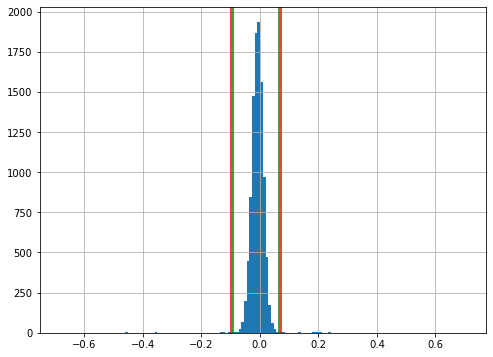

In [31]:
plt.figure(figsize=(8,6))
merge["log ratio"].hist(bins=150)
plt.axvline(x=-0.097854, color='r', label="threshold")
plt.axvline(x=0.073922, color='r', label="threshold")
plt.axvline(x=ptaft*percentile1, color='g', label="threshold")
plt.axvline(x=ptaft*percentile99, color='g', label="threshold")
plt.show()

In [32]:
merge["QC"] = ((merge["log ratio"]>-0.097854) & (merge["log ratio"]<0.073922)) 
len(merge[merge["QC"]==False])

52

In [33]:
merge = merge.rename(columns={"ID":"participant_id"})
merge["QC"] = merge["QC"].apply(lambda x: 1 if x else 0)
merge["comments"] = merge["QC"].apply(lambda x: None if x else "Many more voxels in one of the two hemisphere skeletons.")

In [35]:
merge[["participant_id", "QC", "comments"]].to_csv("/neurospin/dico/data/deep_folding/current/datasets/ABCD/qc_skel.tsv", sep="\t")